In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from statistics import median
from scipy.stats import iqr

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
# model_key => 25000
# M1 (6 months back)=> 10000 
# M1 (6 months after) => 10000

### Problem statement - bmw car price prediction model (best possible features for good predictive model)
     - engine_capacity
     - types of fuel (diesel cars are costly; )
     - color /paint of the car
     - no. of seaters
     - mileage 
     - model type
     - safety features (low/medium/large)
     - date of selling (seasonality)
     - IsAutomative (yes/no)
     - 
     --- second hand cars
     - distance travelled 
     - mileage 
     - age of the car
     - warrenty flag
     - insurance flag
     - condition (poor/ok/good)

In [3]:
df = pd.read_csv('bmw_pricing_challenge.csv')
print(df.shape)
df.info()

(4843, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   maker_key          4843 non-null   object
 1   model_key          4843 non-null   object
 2   mileage            4843 non-null   int64 
 3   engine_power       4843 non-null   int64 
 4   registration_date  4843 non-null   object
 5   fuel               4843 non-null   object
 6   paint_color        4843 non-null   object
 7   car_type           4843 non-null   object
 8   feature_1          4843 non-null   bool  
 9   feature_2          4843 non-null   bool  
 10  feature_3          4843 non-null   bool  
 11  feature_4          4843 non-null   bool  
 12  feature_5          4843 non-null   bool  
 13  feature_6          4843 non-null   bool  
 14  feature_7          4843 non-null   bool  
 15  feature_8          4843 non-null   bool  
 16  price              4843 non-nul

In [4]:
df.describe()

,mileage,engine_power,price
count,4.843000e+03,4843.00000,4843.000000
mean,1.409628e+05,128.98823,15828.081767
std,6.019674e+04,38.99336,9220.285684
min,-6.400000e+01,0.00000,100.000000
25%,1.029135e+05,100.00000,10800.000000
50%,1.410800e+05,120.00000,14200.000000
75%,1.751955e+05,135.00000,18600.000000
max,1.000376e+06,423.00000,178500.000000


In [5]:
# df.registration_date.min()

In [6]:
df.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,01-02-2012,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,01-01-2018
1,BMW,M4,13929,317,01-04-2016,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,01-02-2018
2,BMW,320,183297,120,01-04-2012,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,01-02-2018
3,BMW,420,128035,135,01-07-2014,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,01-02-2018
4,BMW,425,97097,160,01-12-2014,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,01-04-2018


In [7]:
# column1 -> 1 to 100 (missing values)
# col1 -> 50 ; col2 -> 100 - 500
# col1 -> NA ; col2 -> 450
# column2  -> 1 to 1000 (no missing values)

### EDA
- duplicates check
#### univariate analysis
    - missing?
    - Encoding 
    - feature engineering 
    - outliers?
#### bivariate analysis
    - correlation coefficient 
    

In [8]:
## duplicate check
df.duplicated().sum()

0

In [9]:
df.maker_key.unique()

array(['BMW'], dtype=object)

In [10]:
df.duplicated(['model_key', 'mileage', 'engine_power',
       'registration_date', 'fuel', 'paint_color', 'car_type', 'feature_1',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
       'feature_7', 'feature_8', 'price', 'sold_at']).sum()

0

In [11]:
### missing values handling
df.isnull().sum()

maker_key            0
model_key            0
mileage              0
engine_power         0
registration_date    0
fuel                 0
paint_color          0
car_type             0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
price                0
sold_at              0
dtype: int64

    - if missing values, should we drop them or handle them?
    - column wise
        - if drop? if a column has >= 70% of the values missing - drop the column
        - if a column has missing values < 70 % 
            - missing ~ (5-10%) 
            - missing ~ (40 - 50%)
            - missing ~ (60 - 70%) 
             - filling with central tendancy metrics(mean/median/mode), predicitve imputation, correlation imputation, fill with random values between +- 2 standard deviations from mean/median

    - row wise
        - if a column has 5% missing values, don't drop column but drop all those rows
        - 100 rows (classes 0/1 where (0) 95 rows, (1) 5 rows) (Imbalanced dataset -> minority class and majority class)
            index  col    target
            0       NA     1
            1       50     0
            2       NA     0
            3       NA     1
            4       69     1
            5       70     0

In [12]:
# # predicitve imputation
# 10 columns 100 rows
# 9 columns + 10th column (missing values)
# out of 100 rows (75 rows have certain values and 25 rows have missing values)
# build a model on (75 rows+9 columns, target-> 10th columns  )

## Encoding 
 - OHE (usage: nominal)
 - Label Encoding (usage: ordinal, range, intervals )   

In [13]:
bool_f = df.select_dtypes('boolean').columns

for col in bool_f:
    print(col, df[col].unique())

feature_1 [ True False]
feature_2 [ True False]
feature_3 [False  True]
feature_4 [False  True]
feature_5 [ True False]
feature_6 [ True False]
feature_7 [ True False]
feature_8 [False  True]


In [14]:
for col in bool_f:
    df[col] = df[col].apply(lambda x: 1 if x==True else 0)

In [15]:
df[bool_f]

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,1,1,0,0,1,1,1,0
1,1,1,0,0,0,1,1,1
2,0,0,0,0,1,0,1,0
3,1,1,0,0,1,1,1,1
4,1,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...
4838,0,1,0,0,0,0,1,0
4839,0,1,0,0,0,0,1,1
4840,0,1,0,0,0,0,1,1
4841,1,1,0,0,0,0,1,1


In [16]:
categorical_f = df.select_dtypes('object').columns

In [17]:
categorical_f = [ 'model_key', 'fuel', 'paint_color','car_type']

In [18]:
df[categorical_f]

,model_key,fuel,paint_color,car_type
0,118,diesel,black,convertible
1,M4,petrol,grey,convertible
2,320,diesel,white,convertible
3,420,diesel,red,convertible
4,425,diesel,silver,convertible
...,...,...,...,...
4838,218 Gran Tourer,diesel,black,van
4839,218 Active Tourer,diesel,grey,van
4840,218 Gran Tourer,diesel,grey,van
4841,218 Active Tourer,diesel,brown,van


In [19]:
# distinct values for each categorical features
for col in categorical_f:
    print(col, df[col].unique(), '=>', df[col].nunique())

model_key ['118' 'M4' '320' '420' '425' '335' '325' 'Z4' '120' '220' '650' '135'
 '218' '318' '430' 'M3' '330' '225' 'M235' '316' '435' '640'
 '640 Gran Coupé' '435 Gran Coupé' 'i8' '630' '430 Gran Coupé' '635' '520'
 '525' '530' '535' '320 Gran Turismo' '518' '116' '328' '523' 'X3' 'M550'
 '528' '325 Gran Turismo' '125' '318 Gran Turismo' '420 Gran Coupé' 'i3'
 '114' '520 Gran Turismo' '530 Gran Turismo' 'M135' '418 Gran Coupé'
 '330 Gran Turismo' '335 Gran Turismo' '730' '123' '535 Gran Turismo'
 '740' '750' 'ActiveHybrid 5' '735' 'M5' 'X5' 'X1' 'X4' 'X6' 'X6 M' 'X5 M'
 'X5 M50' '218 Active Tourer' '218 Gran Tourer' '216' '220 Active Tourer'
 '216 Gran Tourer' '216 Active Tourer' '225 Active Tourer'
 '214 Gran Tourer'] => 75
fuel ['diesel' 'petrol' 'hybrid_petrol' 'electro'] => 4
paint_color ['black' 'grey' 'white' 'red' 'silver' 'blue' 'orange' 'beige' 'brown'
 'green'] => 10
car_type ['convertible' 'coupe' 'estate' 'hatchback' 'sedan' 'subcompact' 'suv'
 'van'] => 8


In [20]:
## if assigns (1,2,3,4) for encoding fuel ; which level should be assigned with what value?
# fuel ['diesel' 'petrol' 'hybrid_petrol' 'electro'] [3,2,4,1]

#### Encoding 'fuel' types

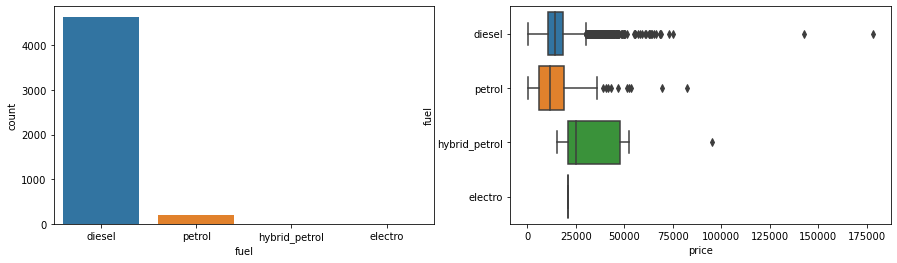

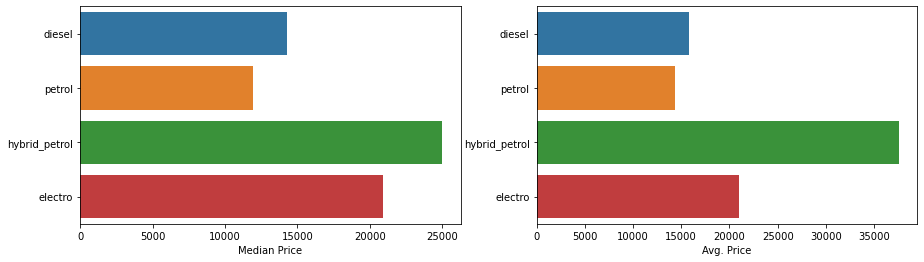

In [21]:
### plot frequency of each of the fuel types and five point summary on price for each fuel type
fig, ax = plt.subplots(1,2,figsize = (15,4))
sns.countplot(df.fuel, ax = ax[0])
sns.boxplot(x ='price',y = 'fuel', data = df, ax = ax[1])
plt.show()


### get plot normalised metrices on price for each fuel type
fuel_PU = []
for each in df.fuel.unique():
    x = df[df.fuel==each]
    fuel_PU.append(median(x['price'])) # getting median

fig, ax = plt.subplots(1,2,figsize = (15,4))
sns.barplot(fuel_PU, df.fuel.unique(), ax = ax[0])
ax[0].set_xlabel('Median Price')
# ax[1].set_ylabel('Fuel Type')

fuel_PU = []
for each in df.fuel.unique():
    x = df[df.fuel==each]
    fuel_PU.append(np.mean(x['price']))

sns.barplot(fuel_PU, df.fuel.unique(), ax = ax[1])
ax[1].set_xlabel('Avg. Price')
# ax[2].set_ylabel('Fuel Type')

plt.show()

- Quick observations:
    - Median price of hybrid-petrol cars are highest amongst all types, while petrol cars have lowest median price. If median is to be considered as deciding metric then, order of weightage for each fuel types follows:
        - {'diesel':2,'petrol':1,'hybrid_petrol':4, 'electro':3}
    - Average price for each fuel type suggest weightage as: 
        - {'diesel':2,'petrol':1,'hybrid_petrol':4, 'electro':3}
    - Negligible outliers impact on price by fuel type
    - Hence, fuel can be lacoded with the weightage assignment as follows:
     - {'diesel':2,'petrol':1,'hybrid_petrol':4, 'electro':3}

In [22]:
df['fuel_E'] = df.fuel.map({'diesel':2,'petrol':1,'hybrid_petrol':4, 'electro':3})

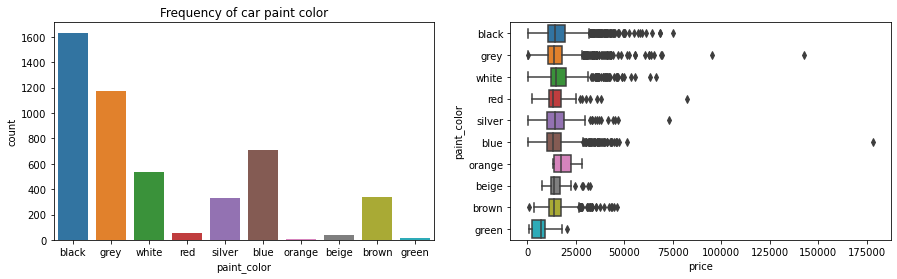

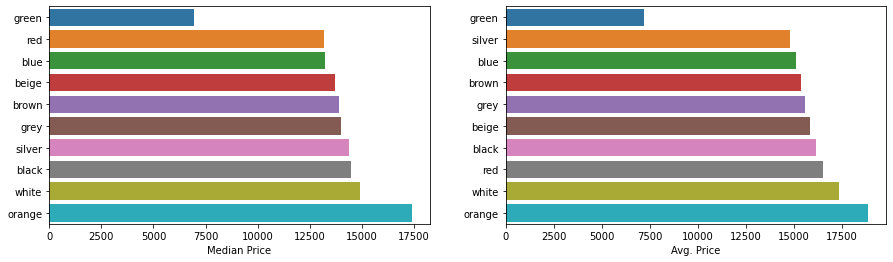

In [23]:
### plot frequency of each of the paint_color and five point summary on price for each paint_color  type
fig, ax = plt.subplots(1,2,figsize = (15,4))
sns.countplot(df.paint_color , ax = ax[0]).set_title('Frequency of car paint color')
sns.boxplot(x ='price',y = 'paint_color', data = df, ax = ax[1])
plt.show()


### get plot normalised metrices on price for each paint_color  type
paint_color_PU = []
for each in df.paint_color .unique():
    x = df[df.paint_color ==each]
    paint_color_PU.append(median(x['price'])) # getting median

fig, ax = plt.subplots(1,2,figsize = (15,4)) 
sns.barplot(sorted(paint_color_PU), df.paint_color.unique()[np.argsort(paint_color_PU)], ax = ax[0])
ax[0].set_xlabel('Median Price')
# ax[1].set_ylabel('paint_color  Type')

paint_color_PU = []
for each in df.paint_color .unique():
    x = df[df.paint_color ==each]
    paint_color_PU.append(np.mean(x['price']))

sns.barplot(sorted(paint_color_PU), df.paint_color.unique()[np.argsort(paint_color_PU)], ax = ax[1])
ax[1].set_xlabel('Avg. Price')
# ax[2].set_ylabel('paint_color  Type')

plt.show()

In [24]:
paint_col_each= [np.mean(df[df.paint_color==each]['price']) for each in df.paint_color.unique()]
# dummy dataframe
x = pd.DataFrame(df.paint_color.unique(), columns=['paint_color'])
x['total_avgPrice']  = df['price'].mean()
x['avgPrice_by_color'] = paint_col_each
x['diff_avgPrice'] = (x.total_avgPrice - x.avgPrice_by_color)/x.total_avgPrice*100
x.sort_values('diff_avgPrice')

,paint_color,total_avgPrice,avgPrice_by_color,diff_avgPrice
6,orange,15828.081767,18866.666667,-19.197430
2,white,15828.081767,17328.438662,-9.479082
3,red,15828.081767,16500.000000,-4.245102
0,black,15828.081767,16173.851806,-2.184535
7,beige,15828.081767,15817.073171,0.069551
1,grey,15828.081767,15595.744681,1.467879
8,brown,15828.081767,15367.741935,2.908374
5,blue,15828.081767,15114.929577,4.505614
4,silver,15828.081767,14816.109422,6.393525
9,green,15828.081767,7200.000000,54.511228


- Quick observations:
    - Orange cars have almost same median and average price and highest amost all.
    - Green cars have least median and average price.
    - Other colors of the cars median and average prices are changing in order.
    - All the cars paint colors except orange, white, silver and green, average price is within 5% of the total price.
 - following the observations below weightage can be used for label encoding
        - orange -> 5
        - white -> 4
        - remaing -> 3
        - silver -> 2
        - green -> 1


In [25]:
df['paint_color_E'] = df.paint_color.apply(lambda x : 5 if x == 'orange' else (
4 if x == 'white' else (
2 if x == 'silver' else (
1 if x == 'green' else 3))))

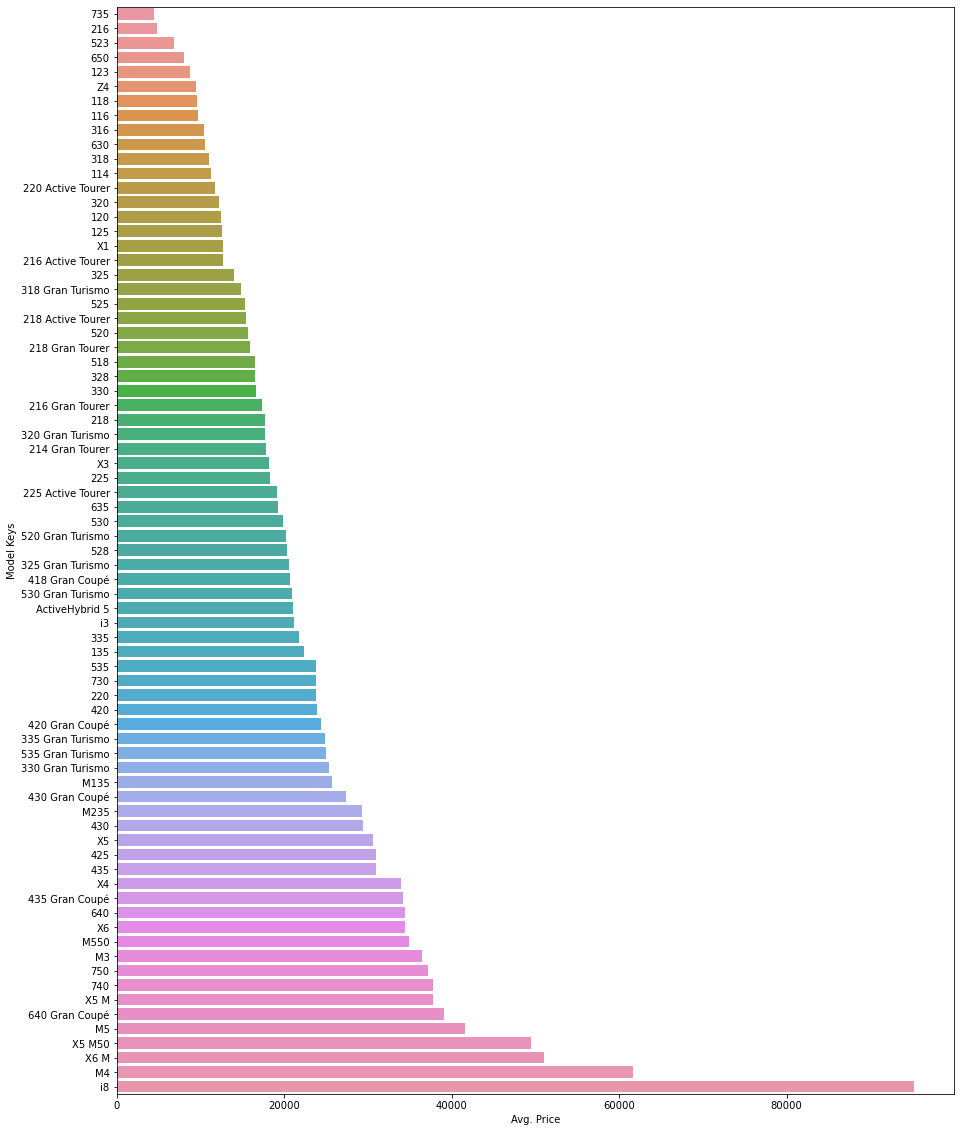

In [26]:
model_key_PU = []
for each in df.model_key.unique():
    x = df[df.model_key==each]
    model_key_PU.append(np.mean(x['price']))
    
len(model_key_PU)    
plt.figure(figsize = (15,20))
x = pd.concat([pd.DataFrame(df.model_key.unique(), columns=['Key']), pd.DataFrame(model_key_PU,columns=['value'])], axis = 1).sort_values('value')
sns.barplot(x='value',y='Key' ,data = x)
plt.xlabel('Avg. Price')
plt.ylabel('Model Keys')
plt.show()

In [27]:
# x.Key.unique()

In [28]:
df['model_key_E'] = df.model_key.apply(lambda x : 5 if x == 'i8' else (
5 if x == 'M4' else (
4 if x == 'X6 M' else (
1 if x == 'X5 M50' else (
1 if x in ('735', '216', '523', '650', '123', 'Z4', '118', '116', '316',
       '630', '318', '114', '220 Active Tourer', '320', '120', '125',
       '216 Active Tourer', 'X1') else (
2 if x in ( '325', '318 Gran Turismo', '525',
       '218 Active Tourer', '520', '218 Gran Tourer', '518', '328', '330',
       '216 Gran Tourer', '218', '320 Gran Turismo', '214 Gran Tourer',
       'X3', '225', '225 Active Tourer', '635', '530', '520 Gran Turismo',
       '528', '325 Gran Turismo', '418 Gran Coupé', '530 Gran Turismo',
       'ActiveHybrid 5', 'i3', '335', '135') else (
3)))))))

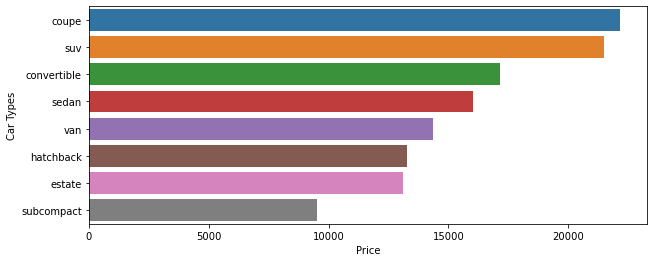

In [29]:
car_type = []
for each in df.car_type.unique():
    x = df[df.car_type==each]
    car_type.append(np.mean(x['price']))
    
x = pd.concat([pd.DataFrame(df.car_type.unique(), columns=['Key']), pd.DataFrame(car_type,columns=['value'])], axis = 1).sort_values('value', ascending= False)
plt.figure(figsize = (10,4))
sns.barplot(x='value',y='Key' ,data = x)
plt.xlabel('Price')
plt.ylabel('Car Types')
plt.show()

In [30]:
df['car_type_E'] = df.car_type.apply(lambda x : 1 if x == 'subcompact' else (
2 if x == 'estate' else (
3 if x == 'hatchback' else (
4 if x == 'van' else (
5 if x == 'sedan' else (
6 if x == 'convertible' else (
7 if x == 'suv' else 8)))))))

In [31]:
## based on car type, no. of seats 

#### Capturing interraction effects between features

Text(0, 0.5, 'Model Key')

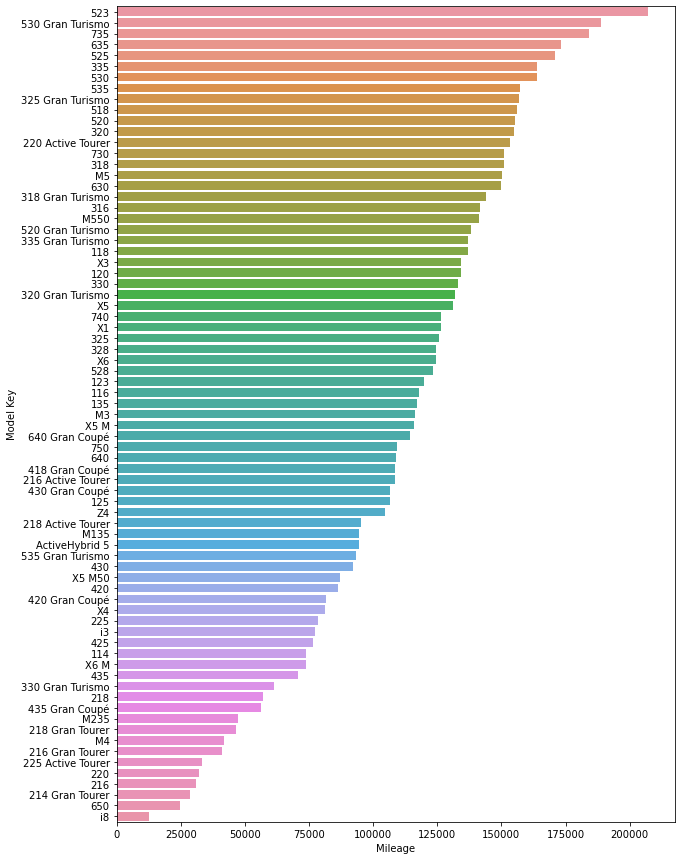

In [32]:
### relation between model_key and mileage
mileage_N = []
for each in df.model_key.unique():
    x = df[df.model_key==each]
    mileage_N.append(sum(x['mileage'])/len(x))
    
x = pd.concat([pd.DataFrame(df.model_key.unique(), columns=['Key']), pd.DataFrame(mileage_N,columns=['value'])], axis = 1).sort_values('value', ascending= False)
plt.figure(figsize = (10,15))
sns.barplot(x='value',y='Key' ,data = x)
plt.xlabel('Mileage')
plt.ylabel('Model Key')

In [33]:
# x.Key.unique()

In [34]:
df['model_key_mileage_rel'] = df.model_key.apply(lambda x : 5 if x == '523' else (
4 if x in ('530 Gran Turismo', '735', '635', '525', '335', '530') else (
3 if x in ('535', '325 Gran Turismo', '518', '520', '320',
       '220 Active Tourer', '730', '318', 'M5', '630', '318 Gran Turismo',
       '316', 'M550', '520 Gran Turismo', '335 Gran Turismo', '118', 'X3',
       '120', '330', '320 Gran Turismo', 'X5') else (
2 if x in ('X1', '740', '325', '328',
       'X6', '528', '640 Gran Coupé', '123', '116', '135', 'M3', 'X5 M',
       '750', '640', '418 Gran Coupé', '216 Active Tourer',
       '430 Gran Coupé', '125', 'Z4') else (
1)))))

In [35]:
# for each in df.fuel.unique():
#     print(each,df[df.fuel==each][['price']].describe())

In [36]:
# df[(df.model_key=='X1') & (df.fuel=='diesel') & (df.paint_color=='white') & (df.car_type=='suv')]

<AxesSubplot:xlabel='engine_power', ylabel='price'>

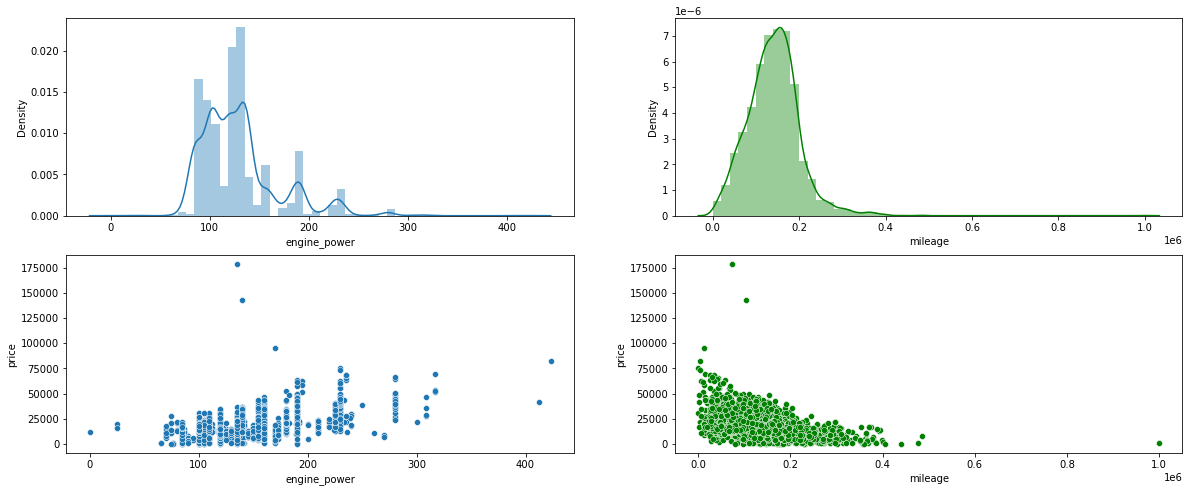

In [37]:
fig, ax = plt.subplots(2,2,figsize = (20,8))
sns.distplot(df.engine_power, ax = ax[0,0])
sns.distplot(df.mileage, ax = ax[0,1], color = 'green')
sns.scatterplot(df.mileage, df.price , ax = ax[1,1],color = 'green')
sns.scatterplot(df.engine_power, df.price , ax = ax[1,0])

In [38]:
df[df.engine_power==df.engine_power.min()] # error?

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,fuel_E,paint_color_E,model_key_E,car_type_E,model_key_mileage_rel
3765,BMW,X1,81770,0,01-10-2014,diesel,white,suv,0,0,0,0,0,0,0,0,11700,01-03-2018,2,4,1,7,2


In [39]:
df[df.engine_power==df.engine_power.max()]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,fuel_E,paint_color_E,model_key_E,car_type_E,model_key_mileage_rel
4146,BMW,X6 M,2970,423,01-04-2016,petrol,red,suv,1,1,1,0,0,0,1,1,82400,01-04-2018,1,3,4,7,1


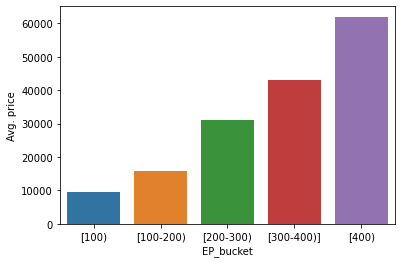

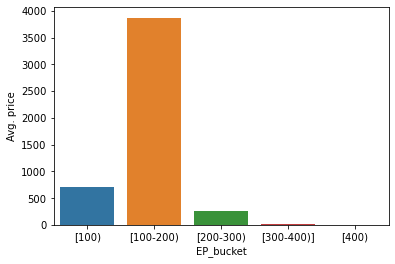

,count,mean,std,min,25%,50%,75%,max
EP_bucket,,,,,,,,
[100),712.0,9696.910112,3646.008781,100.0,8300.0,10000.0,11400.0,28000.0
[100-200),3869.0,15870.793487,8188.184157,100.0,11800.0,14800.0,18800.0,178500.0
[200-300),251.0,31214.741036,13103.223338,4500.0,21800.0,29500.0,39250.0,75000.0
[300-400)],9.0,43133.333333,15505.402284,22000.0,28600.0,47000.0,52400.0,69700.0
[400),2.0,62000.000000,28849.956672,41600.0,51800.0,62000.0,72200.0,82400.0


In [40]:
### bucketing price in range of 100
df['EP_bucket'] = df.engine_power.apply(lambda x: '[100)' if x < 100 else ('[100-200)'  if x < 200 else ('[200-300)' if x < 300 else ('[300-400)]' if x < 400 else '[400)') )))
x = df.groupby('EP_bucket')['price'].mean().reset_index()
sns.barplot(x = x.EP_bucket, y = x.price).set_ylabel('Avg. price')
plt.show()
x = df.groupby('EP_bucket')['price'].count().reset_index()
sns.barplot(x = x.EP_bucket, y = x.price).set_ylabel('Avg. price')
plt.show()
df.groupby('EP_bucket')['price'].describe()

- Note: engine_power is already numerical form and can be feed as a feature in raw form. 
    - more analysis can be done to find any peculiar point from the data 

### target analysis

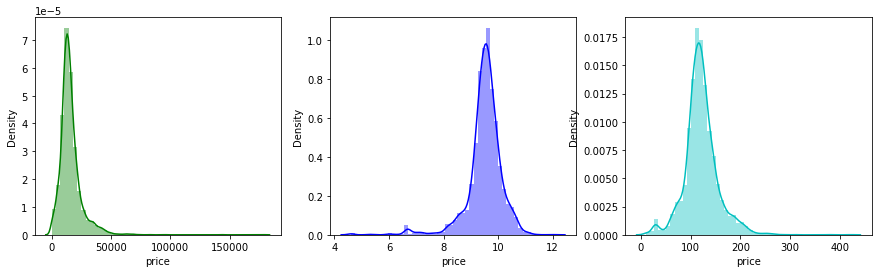

In [41]:
fig, ax = plt.subplots(1,3,figsize = (15,4))
sns.distplot(df.price, color = 'green', ax = ax[0])
sns.distplot(np.log(df.price), color = 'blue', ax = ax[1])
sns.distplot(np.sqrt(df.price), color = 'c', ax = ax[2])
plt.show()

In [42]:
## correlaation 
df[['mileage', 'engine_power','price']].corr()

,mileage,engine_power,price
mileage,1.000000,-0.050116,-0.409564
engine_power,-0.050116,1.000000,0.638989
price,-0.409564,0.638989,1.000000


### date related features analysis

In [43]:
df.registration_date = pd.to_datetime(df.registration_date)
df.sold_at = pd.to_datetime(df.sold_at)
df['gap_reg_sold_year'] =  df.sold_at.dt.year - df.registration_date.dt.year 
df['reg_month'] = df.registration_date.dt.month
df['gap_reg_sold_days'] =  df.sold_at - df.registration_date 
df['gap_reg_sold_days'] = df.gap_reg_sold_days.apply(lambda x: int(str(x).split()[0]))

In [44]:
df.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,fuel_E,paint_color_E,model_key_E,car_type_E,model_key_mileage_rel,EP_bucket,gap_reg_sold_year,reg_month,gap_reg_sold_days
0,BMW,118,140411,100,2012-01-02,diesel,black,convertible,1,1,0,0,1,1,1,0,11300,2018-01-01,2,3,1,6,3,[100-200),6,1,2191
1,BMW,M4,13929,317,2016-01-04,petrol,grey,convertible,1,1,0,0,0,1,1,1,69700,2018-01-02,1,3,5,6,1,[300-400)],2,1,729
2,BMW,320,183297,120,2012-01-04,diesel,white,convertible,0,0,0,0,1,0,1,0,10200,2018-01-02,2,4,1,6,3,[100-200),6,1,2190
3,BMW,420,128035,135,2014-01-07,diesel,red,convertible,1,1,0,0,1,1,1,1,25100,2018-01-02,2,3,3,6,1,[100-200),4,1,1456
4,BMW,425,97097,160,2014-01-12,diesel,silver,convertible,1,1,0,0,0,1,1,1,33400,2018-01-04,2,2,3,6,1,[100-200),4,1,1453


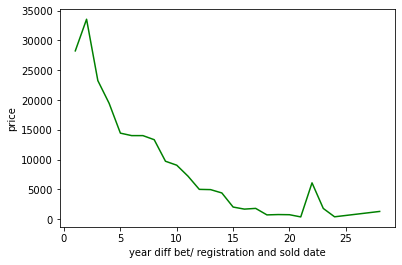

In [45]:
### hypothesis: How does the estimated value of a car change over time?
x = df.groupby('gap_reg_sold_year')['price'].mean().reset_index()
sns.lineplot(x.gap_reg_sold_year, x.price ,color = 'green').set_xlabel('year diff bet/ registration and sold date')
plt.show()

--- Practice analysis (perform analysis to answer following questions)

Additional time analysis of price
- price pattern wrt. month
- price pattern weekdays
- price pattern by gap_reg_sold_days

- correlation check 
        - pearson correlation coefficient (degree linear relationship between two continuous variables)
                - V1 V2   Type of correlation
                - C C    -> pearson correlation coefficient
                - C D    -> ANOVA test / spermans correlation coefficient
                - D C    -> ANOVA test
                - D D    -> chi-square test

In [46]:
## correlaation 
df[['mileage', 'engine_power','price','gap_reg_sold_year']].corr()

,mileage,engine_power,price,gap_reg_sold_year
mileage,1.000000,-0.050116,-0.409564,0.507261
engine_power,-0.050116,1.000000,0.638989,-0.082577
price,-0.409564,0.638989,1.000000,-0.449878
gap_reg_sold_year,0.507261,-0.082577,-0.449878,1.000000


In [47]:
### drop records where mileage is negative and engine_power is 0
df.drop(df[df.mileage < 0].index, axis = 0, inplace = True)
df.drop(df[df.engine_power == 0].index, axis = 0, inplace = True)

In [48]:
df.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,fuel_E,paint_color_E,model_key_E,car_type_E,model_key_mileage_rel,EP_bucket,gap_reg_sold_year,reg_month,gap_reg_sold_days
0,BMW,118,140411,100,2012-01-02,diesel,black,convertible,1,1,0,0,1,1,1,0,11300,2018-01-01,2,3,1,6,3,[100-200),6,1,2191
1,BMW,M4,13929,317,2016-01-04,petrol,grey,convertible,1,1,0,0,0,1,1,1,69700,2018-01-02,1,3,5,6,1,[300-400)],2,1,729
2,BMW,320,183297,120,2012-01-04,diesel,white,convertible,0,0,0,0,1,0,1,0,10200,2018-01-02,2,4,1,6,3,[100-200),6,1,2190
3,BMW,420,128035,135,2014-01-07,diesel,red,convertible,1,1,0,0,1,1,1,1,25100,2018-01-02,2,3,3,6,1,[100-200),4,1,1456
4,BMW,425,97097,160,2014-01-12,diesel,silver,convertible,1,1,0,0,0,1,1,1,33400,2018-01-04,2,2,3,6,1,[100-200),4,1,1453


## Modelling



In [49]:
# import packages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_log_error

In [50]:
df.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,fuel_E,paint_color_E,model_key_E,car_type_E,model_key_mileage_rel,EP_bucket,gap_reg_sold_year,reg_month,gap_reg_sold_days
0,BMW,118,140411,100,2012-01-02,diesel,black,convertible,1,1,0,0,1,1,1,0,11300,2018-01-01,2,3,1,6,3,[100-200),6,1,2191
1,BMW,M4,13929,317,2016-01-04,petrol,grey,convertible,1,1,0,0,0,1,1,1,69700,2018-01-02,1,3,5,6,1,[300-400)],2,1,729
2,BMW,320,183297,120,2012-01-04,diesel,white,convertible,0,0,0,0,1,0,1,0,10200,2018-01-02,2,4,1,6,3,[100-200),6,1,2190
3,BMW,420,128035,135,2014-01-07,diesel,red,convertible,1,1,0,0,1,1,1,1,25100,2018-01-02,2,3,3,6,1,[100-200),4,1,1456
4,BMW,425,97097,160,2014-01-12,diesel,silver,convertible,1,1,0,0,0,1,1,1,33400,2018-01-04,2,2,3,6,1,[100-200),4,1,1453


In [51]:
features = ['mileage', 'engine_power', 'feature_1',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
       'feature_7', 'feature_8', 'fuel_E', 'paint_color_E',
       'model_key_E', 'car_type_E', 'model_key_mileage_rel','gap_reg_sold_year']

target = 'price'

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size = 0.2, random_state = 42 )
print(X_train.shape[0])
print(X_test.shape[0])

3872
969


In [53]:
## random forest model (value prediction model)
RFModel = RandomForestRegressor().fit(X_train,y_train) # training

In [54]:
## 
print('Train R^2 score {}'.format(r2_score(y_train, RFModel.predict(X_train))))
print('Test R^2 score {}'.format(r2_score(y_test, RFModel.predict(X_test))))


print('Train mean_squared_log_error {}'.format(mean_squared_log_error(y_train, RFModel.predict(X_train))))
print('Test mean_squared_log_error {}'.format(mean_squared_log_error(y_test, RFModel.predict(X_test))))

Train R^2 score 0.9639675863447942
Test R^2 score 0.8329372305175761
Train mean_squared_log_error 0.03667891149358619
Test mean_squared_log_error 0.15312445373632005


- Is the model overfitted?
- can we reply on only R^2 score?
- 


When to use label encoding and when to use OHE encoding?